Îç∞Ïù¥ÌÑ∞ Î∞è ÏΩîÎìú: https://github.com/datascienceabe/study_open/tree/master/anomaly_detection_twitter

In [2]:
setwd('C:/Users/bki19/Desktop/anomaly_detection_twitter')

Ìä∏ÏúÑÌÑ∞ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ (anomaly detection) ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Í≥µÎ∂ÄÌïú ÎÇ¥Ïö©ÏûÖÎãàÎã§.<br>
ÎÖºÎ¨∏ÏùÑ Í≥µÎ∂ÄÌïòÎ©¥ÏÑú STL-H-ESD ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏâΩÍ≤å Ïù¥Ìï¥Ìï† Ïàò ÏûàÎèÑÎ°ù ÏΩîÎìúÏôÄ ÏòàÏ†úÎ•º ÌÜµÌï¥ Ï£ºÏÑùÏùÑ Îã¨ÏïòÏäµÎãàÎã§.<br>
<br>
Ï∂úÏ≤ò:
- Hochenbaum, J., Vallis, O. S., & Kejariwal, A. (2017). Automatic anomaly detection in the cloud via statistical learning. arXiv preprint arXiv:1704.07706.<br>
- https://github.com/twitter/AnomalyDetection/tree/master/R

Î™©Ï∞®<br>
1. 3-sigma rule (ÎÖºÎ¨∏ 3.1.1)
2. Tests for Outliers<br>
 2-1. Grubbs Test (ÎÖºÎ¨∏ 2.1.1)<br>
 2-2. ESD (ÎÖºÎ¨∏ 2.1.2)<br>
 2-3. Median and MAD (ÎÖºÎ¨∏ 2.1.3)<br>
3. ÏãúÍ≥ÑÏó¥Ï†Å Ï†ëÍ∑º Î∞©Î≤ï<br>
 3-1. Moving Averages (ÎÖºÎ¨∏ 3,2)<br>
 3-2. Seasonality and STL (ÎÖºÎ¨∏ 3.3)<br>
4. TwitterÏùò Ï†úÏïà Î™®Îç∏<br>
 4-1. STL Variants (S-ESD) (ÎÖºÎ¨∏ 3.4.1)<br>
 4-2. Seasonal Hybrid ESD (S-H-ESD) (ÎÖºÎ¨∏ 3.5)<br>
5. ÌèâÍ∞Ä<br>


# 1. 3-sigma rule

Î≥∏Î°†ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÍ∏∞ Ï†ÑÏóê ÌùîÌïòÍ≤å ÏÇ¨Ïö©ÎêòÎäî 3-sigma ruleÏùÑ ÏÇ¥Ìé¥Î≥¥Í≥† ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò anomaly detectionÏùò Ïñ¥Î†§ÏõÄÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌëúÏ§ÄÌé∏Ï∞®Ïùò 3Î∞∞ Ïù¥ÏÉÅÏù∏ ÏßÄÏ†êÏùÑ Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎã® <br>
Îç∞Ïù¥ÌÑ∞Í∞Ä Normal Î∂ÑÌè¨Î•º Îî∞Î•∏ Îã§Îäî Í∞ÄÏ†ï <br>
<br>
Ïû•Ï†ê<br>
- Ïã¨ÌîåÌï®
- Global anomaly Ï∞æÍ∏∞ Ïâ¨ÏõÄ

Îã®Ï†ê
- Í≥ÑÏ†àÏÑ± ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïóê Ïûò Ïïà ÎßûÏùå
- ÎÑàÎ¨¥ Îã®ÏàúÌïú Ï†ëÍ∑º Î∞©Î≤ï

In [3]:
load("./data/raw_data.rda") 

<b>Îç∞Ïù¥ÌÑ∞: Ìä∏ÏúÑÌÑ∞ Production data<br></b>
- 1Î∂Ñ Îã®ÏúÑ Îç∞Ïù¥ÌÑ∞
- ÌïòÎ£® Í∞ÑÍ≤©ÏúºÎ°ú Í≥ÑÏ†àÏÑ±Ïù¥ Ï°¥Ïû¨<br>
- Ï¥ù Îç∞Ïù¥ÌÑ∞ Í∏∞Í∞ÑÏùÄ 10Ïùº Í∞ÄÎüâ

In [4]:
head(raw_data)

timestamp           count  
1 1980-09-25 14:01:00 182.478
2 1980-09-25 14:02:00 176.231
3 1980-09-25 14:03:00 183.917
4 1980-09-25 14:04:00 177.798
5 1980-09-25 14:05:00 165.469
6 1980-09-25 14:06:00 181.878

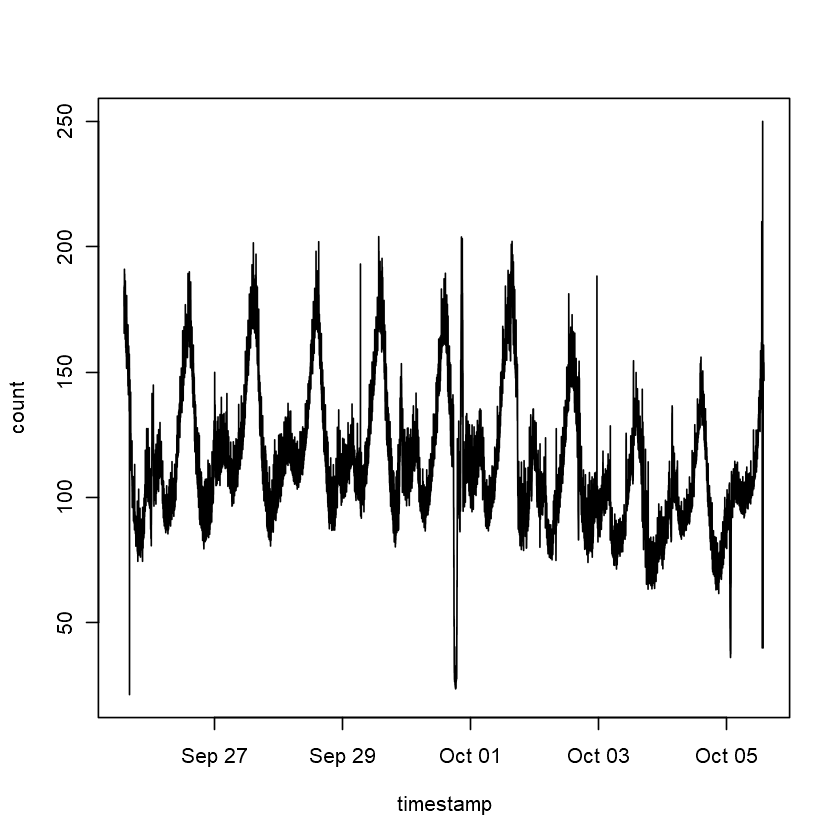

In [5]:
plot(raw_data,type='l')

Ï†ÄÎÖÅ ÏãúÍ∞ÑÏóê ÌîºÌÅ¨Î•º Ï∞çÍ≥† ÌïòÎ£®Í∞Ä ÎÑòÏñ¥Í∞ÄÎäî ÏßÄÏ†êÏóê ÌôïÏó∞Ìûà Îñ®Ïñ¥ÏßÄÎã§Í∞Ä 12Ïãú Î∂ÄÌÑ∞ ÏÉàÎ≤Ω 3Ïãú Í∞ÄÎüâÍπåÏßÄ ÌîºÌÅ¨Î•º Ï∞çÎäî Ìå®ÌÑ¥Ïù¥ Î∞òÎ≥µ<br>
- ÌïòÎ£®ÎßàÎã§ Î∞òÎ≥µ ÎêòÎäî Ìå®ÌÑ¥ Ï°¥Ïû¨ (Í≥ÑÏ†àÏÑ±)

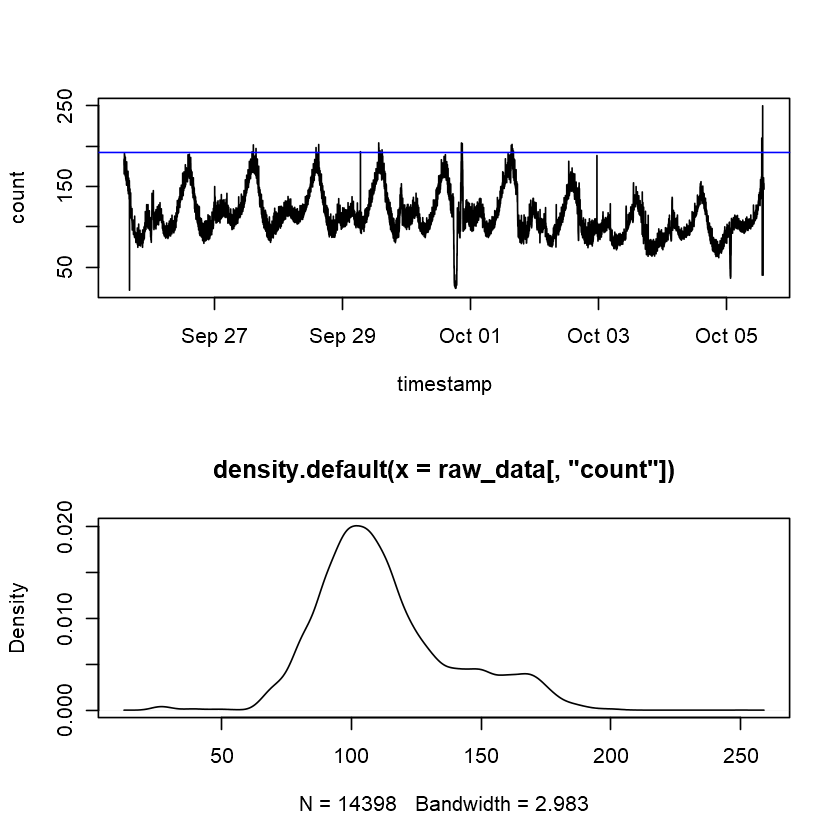

In [6]:
par(mfrow=c(2,1))
plot(raw_data,type='l')
abline(h=mean(raw_data[,'count'])+3*sd(raw_data[,'count']),col='blue')
#hist(raw_data[,'count'])
plot(density(raw_data[,'count']))

$3\sigma$ Í∑úÏπôÏùÄ ÌååÎûÄÏÉâ ÏÑ†($\mu+3\sigma$) ÏúÑÎ•º global anomalyÎ°ú Ï∑®Í∏âÌï¥ ÏâΩÍ≤å Ï∞æÏùå<br>
ÌïòÏßÄÎßå ÏúÑ Îç∞Ïù¥ÌÑ∞Ï≤òÎüº Í≥ÑÏ†àÏÑ±Ïù¥ ÏûàÏùÑ Îïå local anomalyÎ•º Ïûò Î™ª Ï∞æÏùå<br>
<br>
ÏïÑÎûò Í∑∏Î¶ºÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î°ú multimodalÌïú Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ<br>
Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÌôïÌïòÍ≤å Normal Î∂ÑÌè¨ Îî∞Î•¥Í∏∞Í∞Ä Ïñ¥Î†§ÏõÄ

# 2. Tests for Outliers

Í∑∏Î†áÎã§Î©¥ Ïù¥ÏÉÅÏπòÎ•º ÌÉêÏßÄÌï† Ïàò ÏûàÎäî Îçî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏóÑÎ∞ÄÌïú Î∞©Î≤ïÎì§Ïóê ÎåÄÌï¥ ÏïåÏïÑ Î≥¥Í≤†ÏäµÎãàÎã§.<br>
Ï†ÑÌÜµÏ†ÅÏù∏ ÌÜµÍ≥Ñ Î∞©Î≤ïÎ°†Îì§ÏóêÏÑú Ïù¥ÏÉÅÏπò(Anomaly)Î•º ÌÉêÏßÄ ÌïúÎã§Îäî Í≤ÉÏùÄ OutlierÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.

# 2-1 Grubbs Test

<b>Grubbs Test</b>
- ÏùºÎ≥ÄÎüâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏû• ÌÅ∞ Ïù¥ÏÉÅÏπòÎ•º Ï∞æÎäî Î∞©Î≤ï
- Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Í∞Ä NormalÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
<br>
$ùêª_0$:Îç∞Ïù¥ÌÑ∞ ÏÜçÏóê Ïù¥ÏÉÅÏπòÍ∞Ä ÌïòÎÇòÎèÑ ÏóÜÎã§<br>
$ùêª_1$:Ïù¥ÏÉÅÏπòÍ∞Ä ÏµúÏÜåÌïú ÌïòÎÇòÎäî ÏûàÎã§<br>
<br>
ÏñëÏ∏° Í≤ÄÏ†ï: $C >\lambda $ => $ùêª_0$ Í∏∞Í∞Å : Ïù¥ÏÉÅÏπòÍ∞Ä ÏµúÏÜåÌïú ÌïòÎÇòÎäî ÏûàÎã§<br>
Test Statistic: $C=\frac{max_{t} |x_{ùë°}‚àí\bar{x}|  }{s}$<br>
Critical Value: $\lambda=\frac{(N-1)}{\sqrt{N}} \sqrt{ \frac{t^{2}_{p,N-2}}{N-2+t^{2}_{p,N-2}}  }$
Ïó¨Í∏∞ÏÑú $ p=\frac{\alpha}{2N}$<br>
<br>
Îã®Ï∏°Í≤ÄÏ†ï:<br>
ÏµúÎåÄÍ∞í Ï∞æÏùÑ Îïå: $C= \frac{max_{t}(x_{t})-\bar{x}}{s}$ <br>
ÏµúÏÜåÍ∞í Ï∞æÏùÑ Îïå: $C= \frac{\bar{x}-min_{t}(x_{t})}{s}$<br>
Ïó¨Í∏∞ÏÑú $ p=\frac{\alpha}{N}$<br>

- Ïû•Ï†ê: ÏµúÎåÄ Í∞íÏù¥ Ïù¥ÏÉÅÏπòÏù∏ÏßÄ ÌòπÏùÄ ÏµúÏÜåÍ∞íÏù¥ Ïù¥ÏÉÅÏπòÏù∏ÏßÄ Ïïå Ïàò ÏûàÏùå
- Îã®Ï†ê: Ïù¥ÏÉÅÏπòÍ∞Ä Ïó¨Îü¨ Í∞úÏù∏ Í≤ΩÏö∞ Ï†ÅÌï©ÌïòÏßÄ ÏïäÏùå

<b>ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞</b><br>
Ï∂úÏ≤ò:
- Tietjen and Moore (August 1972), Some Grubbs-Type Statistics for the Detection of Outliers, Technometrics, 14(3), pp. 583-597.<br>
- https://www.itl.nist.gov/div898/handbook/eda/section4/eda43.htm#Tietjen  <br>

In [7]:
set.seed(0)
A=c(199.31, 199.53, 200.19, 200.82, 201.92, 201.95, 202.18, 245.57)
B= c(rnorm(20,0,1),c(100), rnorm(20,0,1),c(111) ) 

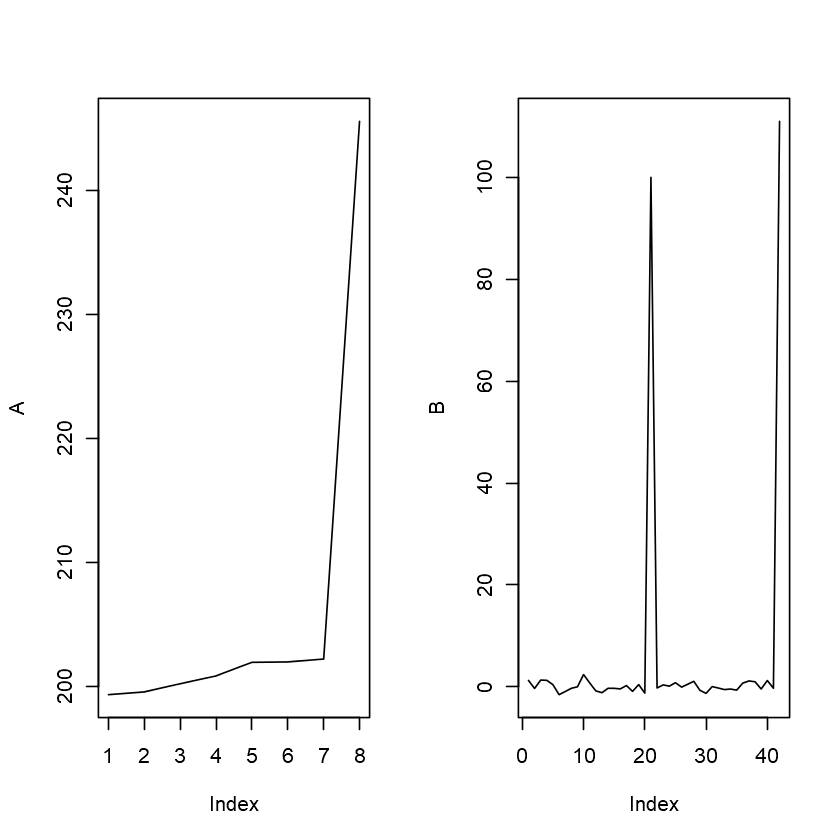

In [8]:
par(mfrow=c(1,2))
plot(A,type='l')
plot(B,type='l')

AÎäî Tietjen and MooreÏùò ÎÖºÎ¨∏Ïùò Îç∞Ïù¥ÌÑ∞Î°ú 8Î≤à Îç∞Ïù¥ÌÑ∞Í∞Ä OutlierÏûÖÎãàÎã§.<br>
BÎäî Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú ÏûÑÏùòÎ°ú ÏÉùÏÑ±ÌïòÍ≥† Îëê Í∞úÏùò OutlierÎ•º Ï§ëÍ∞ÑÏóê ÏßëÏñ¥ ÎÑ£ÏóàÏäµÎãàÎã§.<br>
Grubb's TestÍ∞Ä Îëê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú OutlierÎ•º Ï∞æÏùÑ Ïàò ÏûàÎäîÏßÄ Ïã§ÌóòÌñàÏäµÎãàÎã§.

In [6]:
#Onesided, data, alpha, Max or min
Grubb<-function(Onesided=TRUE,A,alpha=0.05,MAX=TRUE){
    #two-sided
    if (Onesided==FALSE){
        C=abs( max(A)-mean(A))/sd(A) #test statistic
        I=which.max(A)
        N=length(A)
        p=alpha/(2*N)
        t=qt(p ,N-2  )
        T=((N-1)/sqrt(N)  )*sqrt( (t^2)/(N-2+t^2)) # critical value
        
        #reject Null==At least one Abnomalies
        if (C>T) {
            return(which.max( A))
            
        }
        else{
            print('No Outlier')
        }
    }
    
        #one-sided
    else {
        if(MAX==TRUE){
            C=( max(A)-mean(A))/sd(A) #test statistic
            I=which.max(A)
            N=length(A)
            p=alpha/(N)
            t=qt(p ,N-2  )
            T=((N-1)/sqrt(N)  )*sqrt( (t^2)/(N-2+t^2)) # critical value
                if (C>T) {
                    return(which.max( A))
            
                    }
                else{
                    print('No Outlier')
                    }

            }
        else{
            C=( mean(A)-min(A))/sd(A) #test statistic
            I=which.max(A)
            N=length(A)
            p=alpha/(N)
            t=qt(p ,N-2  )
            T=((N-1)/sqrt(N)  )*sqrt( (t^2)/(N-2+t^2)) # critical value
                if (C>T) {
                    return(which.max( A))
            
                    }
                else{
                    print('No Outlier')
                    }

            
            
            }

        }

        
               
}

In [7]:
G1=Grubb(FALSE,A,alpha=0.05,FALSE)
G11=Grubb(FALSE,B,alpha=0.05,FALSE)

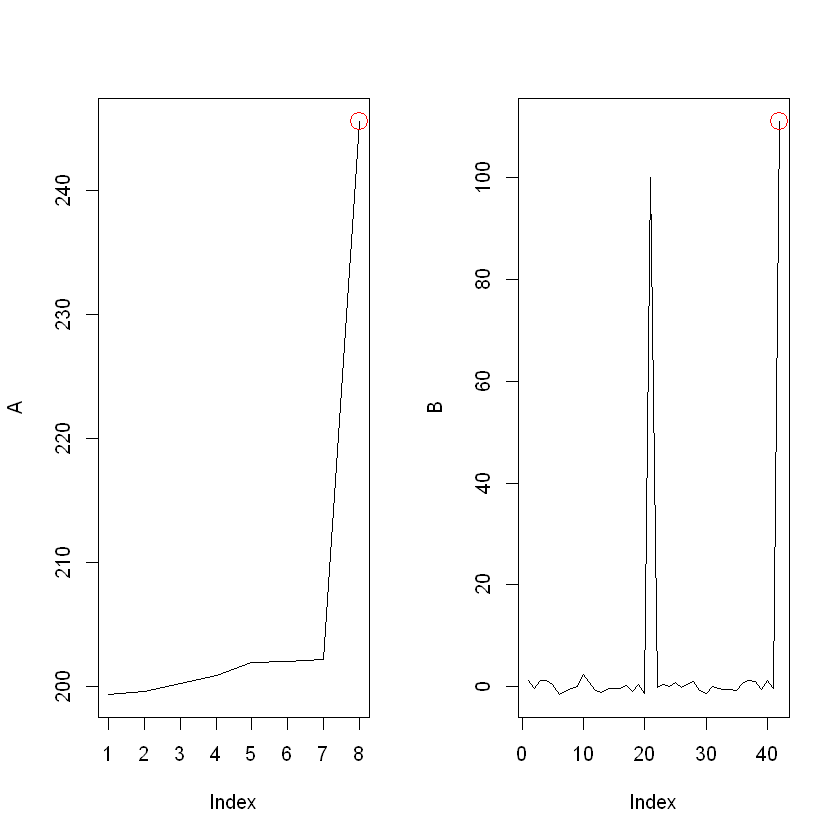

In [8]:
par(mfrow=c(1,2))
plot(A,type='l')
points(G1,A[G1],col='red',cex=2)
plot(B,type='l')
points(G11,B[G11],col='red',cex=2)

Grubb's testÎ°ú Îëê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Îπ®Í∞ÑÏÉâÏúºÎ°ú ÌëúÏãú Îêú anomalyÎ•º Ï∞æÎäîÎç∞ ÏÑ±Í≥µÌñàÏäµÎãàÎã§.<br>
ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞ BÎ•º Î¥§ÏùÑ Îïå Îëê Í∞úÏùò Outlier Ï§ë Í∞ÄÏû• ÌÅ∞ OutlierÎßå Ï∞æÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.<br>
Ïù¥Í≤ÉÏùÄ Grubb's testÍ∞Ä Global anomalyÎ•º Ï∞æÎäî Í≤ÄÏ†ï Î∞©Î≤ïÏù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

# 2-2. ESD Test

ESD(Extreme Studentized Deviate Test)
- Grubbs testÎÇò TietjenMoore testÎäî Ïù¥ÏÉÅÏπòÏùò Í∞úÏàòÎ•º ÎØ∏Î¶¨ Ï†ïÌôïÌïòÍ≤å ÏÑ§Ï†ïÌï¥Ïïº ÌïúÎã§Îäî ÌïúÍ≥ÑÍ∞Ä ÏûàÏùå
- Ïù¥Ïóê Î∞òÌï¥ ESDÎäî Ïó¨Îü¨ Í∞úÏùò Ïù¥ÏÉÅÏπòÎ•º Ï∞æÏùÑ Ïàò ÏûàÍ≥† ÏùòÏã¨ÎêòÎäî Ïù¥ÏÉÅÏπòÏùò Í∞ú ÏàòÏùò ÏÉÅÌïúÎßå ÏûàÏúºÎ©¥ Îê®
- ÏÉÅÌïúÏù¥ Ï£ºÏñ¥ÏßÄÎ©¥ ÏùòÏã¨ÎêòÎäî Ïù¥ÏÉÅÏπòÏùò Í∞úÏàò kÍ∞úÏóêÏÑú k=1,2.,,,kÏóê ÎåÄÌï¥ÏÑú ÏàúÏ∞®Ï†ÅÏúºÎ°ú kÎ≤à Ïù¥ÏÉÅÏπòÎ•º Ï∞æÏùå <br>
$ùêª_0$:Îç∞Ïù¥ÌÑ∞ ÏÜçÏóê Ïù¥ÏÉÅÏπòÍ∞Ä ÌïòÎÇòÎèÑ ÏóÜÎã§<br>
$ùêª_1$:Ïù¥ÏÉÅÏπòÍ∞Ä KÍ∞úÍπåÏßÄ ÏûàÎã§<br>
<br>
ÏñëÏ∏°Í≤ÄÏ†ï:<br>
Critical Value: $C_{k}=\frac{max_{k} |x_{k}-\bar{x}|}{s}$<br>
Test Statictic: $\lambda_{k}=\frac{(n-k)t_{p,n-k-1}} {\sqrt{(n-k+1+t^{2}_{p,n-k-1})(n-k+1) }}$<br>
$p=1-\frac{\alpha}{2(n-k+1)}$<br>
<br>
Îã®Ï∏° Í≤ÄÏ†ï:<br>
ÏµúÎåÄ Í∞íÏùÑ Ï∞æÏùÑ Îïå: $C_{k}=\frac{max_{k} (x_{k}-\bar{x})}{s}$<br>
ÏµúÏÜå Í∞íÏùÑ Ï∞æÏùÑ Îïå: $C_{k}=\frac{max_{k} (\bar{x}-x_{k})}{s}$<br>
$p=1-\frac{\alpha}{(n-k+1)}$<br>


Psudo Code<br>
for k in 1:K<br>
    if Test $C_{k=1}> \lambda_{k=1}$
    reject $H_{0}$ => Outlier kÍ∞ú ÏûàÎã§<br>
    $\frac{|x_{t}-\bar{x}|}{s} $ÏùÑ ÏµúÎåÄÌôîÌïòÎäî Îç∞Ïù¥ÌÑ∞ t Ï†úÍ±∞ ÌõÑ ÌÖåÏä§Ìä∏ ÏßÑÌñâ<br>
       

ÏïÑÎûòÏóêÏÑú ÏòàÏ†úÎ•º ÌÜµÌï¥ ÌÖåÏä§Ìä∏ Î∞©Î≤ïÏùÑ ÏÜåÍ∞úÌïòÍ≤†ÏäµÎãàÎã§.


$C_{k}>\lambda_{k}$ Ïù∏ Ïù¥ÏÉÅÏπòÏùò ÏàòÍ∞Ä Í∞ÄÏû• ÌÅ∞  ùëò Í∞Ä ÎêòÎèÑÎ°ù ùëò Î≤à Î∞òÎ≥µ <br>
- Ïã§Ï†ú Ï†ÅÏö©ÌïòÎ©¥ $C_{k}$Í∞Ä $\lambda_{k}$ Î≥¥Îã§ Ïª§Ï°åÎã§Í∞Ä ÏûëÏïÑÏ°åÎã§Í∞Ä Î∞òÎ≥µ ÌïòÎã§Í∞Ä ÎÇòÏ§ëÏóêÎäî $\lambda_{k}$ Î≥¥Îã§ Í≥ÑÏÜç ÏûëÏïÑÏßê 
- ÏòàÏÉÅÎêòÎäî Ïù¥ÏÉÅÏπòÏùò Í∞úÏàòÏóê Îî∞Îùº critical valueÎ•º Ï†ÅÏ†àÌïòÍ≤å Ï°∞Ï†àÌïúÎã§Îäî Ïû•Ï†ê
- Ïã¨Í∞ÅÌïú maskingÏù¥ ÏûàÏúºÎ©¥ Î©àÏ∂∞Î≤ÑÎ¶º
- ÏñëÏ∏° Í≤ÄÏ†ï Î∞ñÏóê ÏïàÎê® (but TwitterÏóêÏÑúÎäî Îã®Ï∏° Í≤ÄÏ†ïÎèÑ Íµ¨ÌòÑ)

Ï∂úÏ≤ò:
- Rosner, Bernard (May 1983), Percentage Points for a Generalized ESD Many-Outlier Procedure,Technometrics, 25(2), pp. 165-172.
- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm

In [9]:
C<-read.csv('./data/anomaly.csv',head=FALSE)
C<-C[,1]

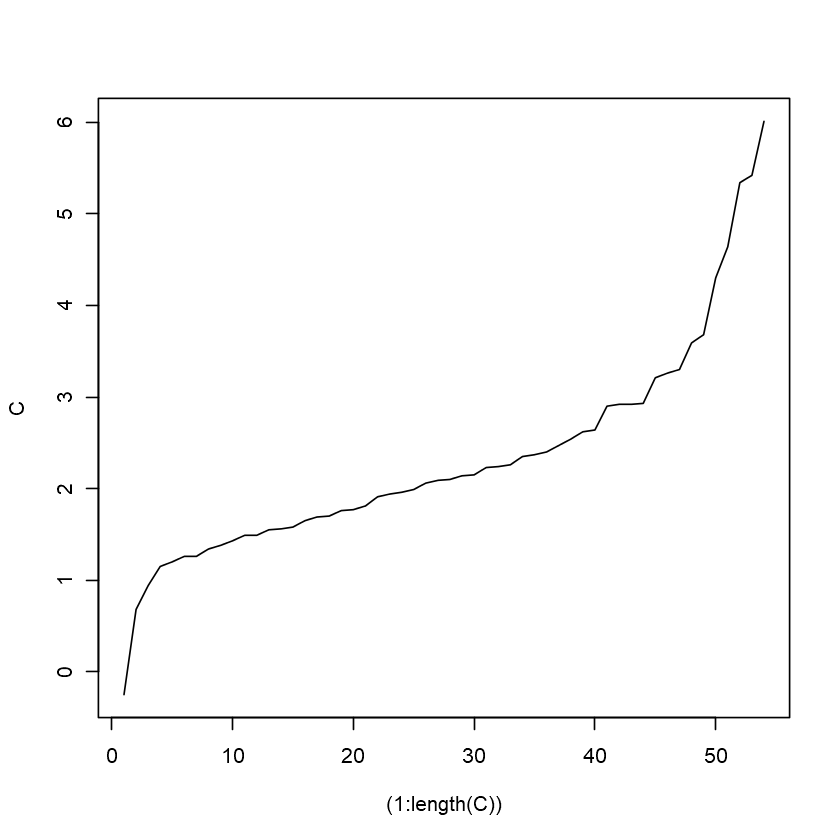

In [10]:
plot(( 1:length(C) ),C,type='l')

In [11]:
ESD<-function(data,alpha=0.05,max_outliers,one_tail=FALSE,upper_tail=TRUE){
    
    n=length(data)
    alpha=0.05
    outlier_idx<-c()
    
    for (i in 1L:max_outliers){

    
    if(one_tail){
        if(upper_tail){
            ares <- data - mean(data)
        } else {
            ares <- mean(data) - data
        }
    } else {
        ares = abs(data - mean(data))
    }
        
    ## Compute critical value.
    data_sigma <- sd(data)
    ares <- ares/data_sigma
    R <- max(ares)

    idx <- which.max(ares) #maximum value's index
    outlier_idx<-c(outlier_idx,idx)
    data <- data[- idx ] #remove maximum data

    ## Compute critical value.
    if(one_tail){
        p <- 1 - alpha/(n-i+1)
    } else {
        p <- 1 - alpha/(2*(n-i+1))
    }
    t <- qt(p,(n-i-1))
    lam <- t*(n-i) / sqrt((n-i-1+t**2)*(n-i+1))

    #When reject Null (There is Outlier)
    if(R > lam) {
        num_anoms <- i
        }
}

### Select maximum k satisfying condition

if(num_anoms > 0) {
    outlier_idx<-outlier_idx[1:num_anoms]
} else {
  outlier_idx<-NULL  
}
return (outlier_idx)    
}

In [12]:
ESD_B=ESD(B,0.05,10,one_tail=FALSE,upper_tail=FALSE)
ESD_C=ESD(C,0.05,10,one_tail=FALSE,upper_tail=FALSE)
ESD_B
ESD_C

[1] 42 21

[1] 54 53 52

ÏúÑ Îç∞Ïù¥ÌÑ∞ CÎ°ú ÌÖåÏä§Ìä∏ ÏßÑÌñâÏóê ÎåÄÌïú ÏòàÎ•º Îì§Í≤†ÏäµÎãàÎã§.<br>
ÏïÑÏõÉÎùºÏù¥Ïñ¥Îäî 10Í∞ú Ïù¥ÌïòÎùºÍ≥† ÏÉùÍ∞ÅÌïòÏó¨ K=20ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥† ÌÖåÏä§Ìä∏Î•º ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.<br>
k=1Ïùº Îïå $\frac{|x_{t}-\bar{x}|}{s}$ÏùÑ ÏµúÎåÄÌôîÌïòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä 54Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞ÏòÄÏäµÎãàÎã§. Ïù¥ Îïå 54Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ ÌõÑ Test statisticÍ≥º Critical valueÎ•º Íµ¨ÌïòÎ©¥ $C_{1}=3.118, \lambda_{1}=3.158$ÏûÖÎãàÎã§.<br>
$C_{1}<\lambda_{1}$Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê $H_{0}$ÏùÑ Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌï¥ ÏïÑÏõÉÎùºÏù¥Ïñ¥Í∞Ä ÏóÜÎã§Îäî Í≤∞Î°†ÏùÑ ÎÇ¥Î¶¨Í≥† k=2Î°ú ÏßÑÌñâÌï©ÎãàÎã§.<br>
<br>
k=2Ïùº Îïå $\frac{|x_{t}-\bar{x}|}{s}$ÏùÑ ÏµúÎåÄÌôîÌïòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä 53Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞ÏòÄÏäµÎãàÎã§.<br>
$C_{2}=2.942, \lambda_{2}=3.151$Î°ú $C_{2}<\lambda_{2}$Î°ú Ïó¨Ï†ÑÌûà Í∏∞Í∞ÅÌïòÏßÄ Î™ªÌï©ÎãàÎã§.<br>
 ÌïòÏßÄÎßå k=3Ïùº Îïå $C_{3}=3.179, \lambda_{3}=3.143$ÏúºÎ°ú $C_{2}>\lambda_{2}$Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê $H_{0}$ÏùÑ Í∏∞Í∞ÅÌïòÏó¨ ÏïÑÏõÉÎùºÏù¥Ïñ¥Í∞Ä 3Í∞ú ÏûàÎã§Îäî Í≤∞Î°†Ïóê ÎèÑÎã¨Ìï©ÎãàÎã§. <br>
 <br>
Ïù¥ÌõÑÏóê $k=4,...10$ÍπåÏßÄ Í≥ÑÏÜç $C_{k}<\lambda_{k}$Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê OutlierÎäî 3Í∞úÎùºÎäî Í≤∞Î°†Ïóê ÎèÑÎã¨Ìï©ÎãàÎã§.
<br>
ÎßåÏïΩÏóê Ïù¥ÌõÑÏùò $k$ÏóêÏÑú $C_{k}>\lambda_{k}$ Ïù∏ Í≤ΩÏö∞Í∞Ä ÏûàÏúºÎ©¥ Í∞ÄÏû• ÌÅ∞ $k$Ïóê ÎåÄÌïú Í≤∞Î°†ÏùÑ ÏàòÏö©Ìï©ÎãàÎã§.

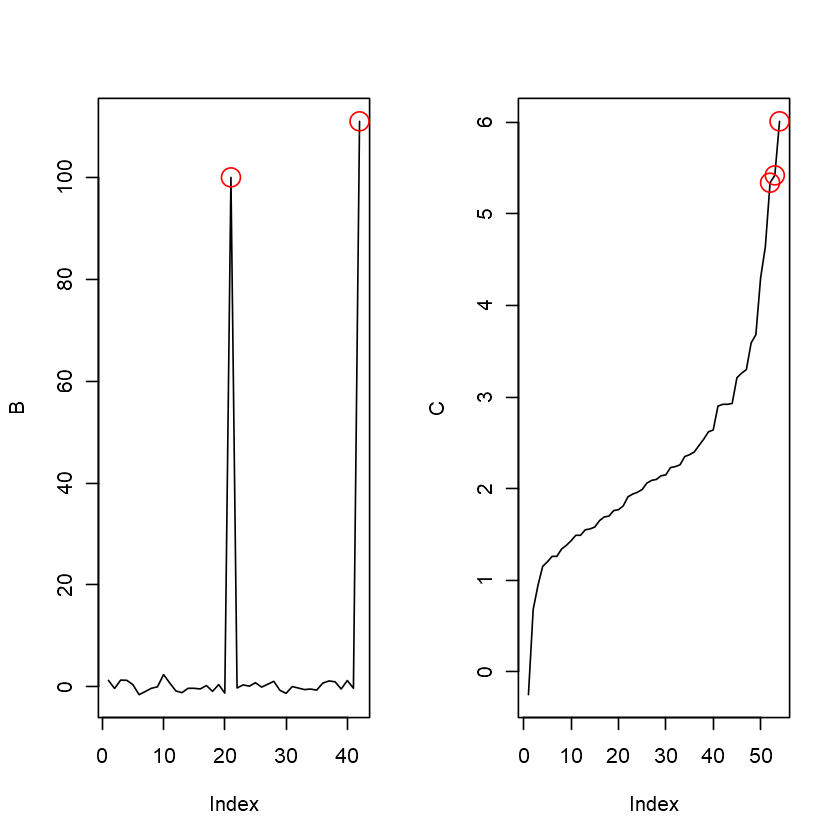

In [13]:
par(mfrow=c(1,2))
plot(B,type='l')
points(ESD_B,B[ESD_B],col='red',cex=2)
plot(C,type='l')
points(ESD_C,C[ESD_C],col='red',cex=2)

ÏúÑ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏùÑ Îïå Îç∞Ïù¥ÌÑ∞ BÏóêÏÑú Îëê Í∞úÏùò outlierÎ•º Î™®Îëê Ï∞æÍ≤å ÎêêÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.<br>
Îã®ÏàúÌïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî ESD Î∞©Î≤ïÏù¥ Ïù¥ÏÉÅÏπòÎ•º Ïûò Ï∞æÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.<br>
ÌïòÏßÄÎßå ÏïûÏóêÏÑú ÏÇ¥Ìé¥ Î¥§Îçò Ìä∏ÏúÑÌÑ∞ Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ Ïûò Ï†ÅÏö©Ïù¥ Îê†ÍπåÏöî?

In [17]:
ESD_data=ESD(raw_data[,2],0.05,8000,one_tail=FALSE,upper_tail=FALSE)

In [18]:
ESD_data

[1] 14368

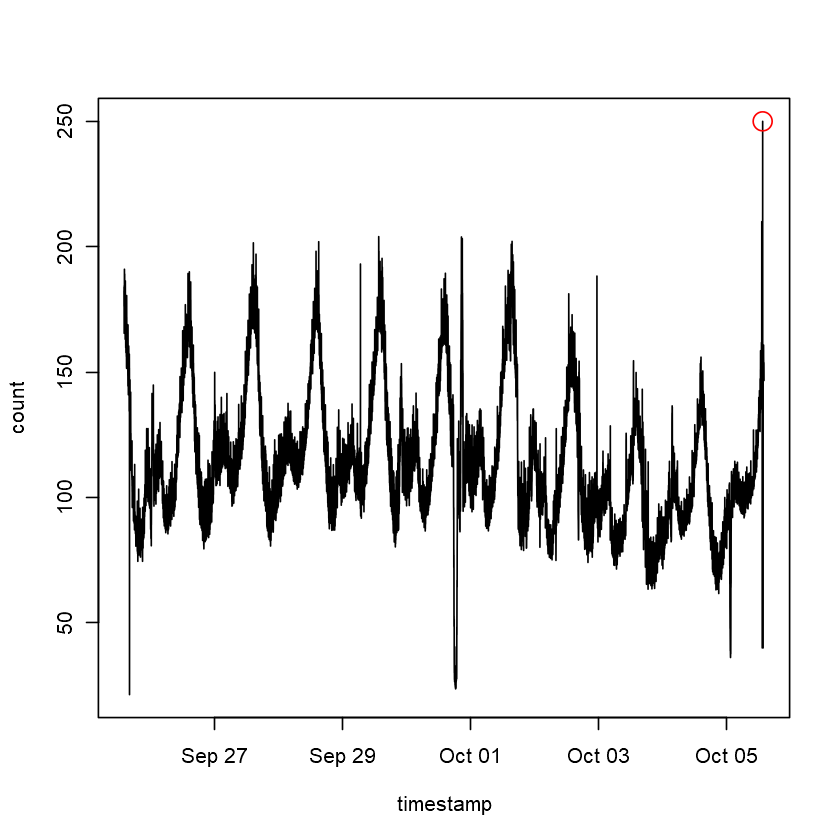

In [19]:
plot(raw_data,type='l')
points(raw_data[ESD_data,],col='red',cex=2)

Ìä∏ÏúÑÌÑ∞ Îç∞Ïù¥ÌÑ∞Ïóê ÏßÅÏ†ë ESDÎ•º Ï†ÅÏö©ÌñàÏùÑ Îïå anomalyÎ•º ÌïòÎÇò Î∞ñÏóê Î™ª Ï∞æÏïòÏäµÎãàÎã§.<br>
Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©ÌñàÎçò ÌÜµÍ≥ÑÎüâÏóê ÎåÄÌïú Î¨∏Ï†úÏôÄ Í≥ÑÏ†àÏÑ±Ïù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïóê Ïñ¥ÎñªÍ≤å Ï†ëÍ∑ºÌï¥Ïïº ÌïòÎäîÏßÄÎ•º ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§.

# 3. ÏãúÍ≥ÑÏó¥Ï†Å Ï†ëÍ∑º Î∞©Î≤ï

Î®ºÏ†Ä Ïù¥ÏÉÅÏπò ÌÉêÏßÄÎ•º ÏúÑÌïú ÎåÄÌëúÏ†ÅÏù∏ ÏãúÍ≥ÑÏó¥Ï†Å Ï†ëÍ∑º Î∞©Î≤ïÏóê ÎåÄÌï¥ ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§

# 3-1. Moving Averages

Î®ºÏ†Ä Í∞ÄÏû• ÎßéÏù¥ Ïì∞Ïù¥Îäî Moving Averages Î∞©Î≤ïÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

Moving AverageÎäî White noiseÏùò ÏòÅÌñ•ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ ÏÇ¨Ïö© <br>
=> white noiseÎ•º ÌïÑÌÑ∞ÎßÅ(smoothÌïòÍ≤å ÎßåÎì§Ïñ¥ Ï§å)

Simple Moving Average(SMA)<br>
$SMA_{t}=\frac{x_{t}+x_{t-1}+...+x_{t-(n-1)}}{n}$<br>
Îç∞Ïù¥ÌÑ∞ÎßàÎã§ Í∞ôÏùÄ Í∞ÄÏ§ëÏπòÎ•º Ï§å

In [21]:
SMA<-function(A,n){
    T<-length(A)
    mean(A[T:(T-n+1)])
    MEAN<-c(rep(NA,(n-1)))
    for (t in (n:T) ){
        MEAN<-c(MEAN,mean(A[t:(t-n+1)]))
        }
    
    return(MEAN)
        
}

Exponentially Weighted Moving Average (EWMA)<br>
$y_{t}=x_{t},  t=1$<br>
$y_{t}=\alpha x_{t} +(1-\alpha)y_{t-1}, t>1 $

SMAÏôÄÎäî Îã§Î•¥Í≤å Ï†Ñ ÏãúÏ†êÏùò Ï†ïÎ≥¥ÏôÄ Îã§Ïùå ÏãúÏ†êÏùò Í∞ÄÏ§ë ÌèâÍ∑†ÏúºÎ°ú Î∞òÏòÅ<br>
$\alpha$:ÌòÑÏû¨ Ï†ïÎ≥¥Ïùò Î∞òÏòÅ ÎπÑÏú®<br>
ÎÜíÏùÑ ÏàòÎ°ù ÌòÑÏû¨ Ï†ïÎ≥¥Î•º ÎßéÏù¥ Î∞òÏòÅÌïòÍ≥† Ï†Ñ ÏãúÏ†êÏùò Ï†ïÎ≥¥ Ï°∞Í∏à Î∞òÏòÅ 

In [22]:
EWMA <- function (x, ratio) {
  c(filter(x * ratio, 1 - ratio, "recursive", init = x[1]))
}

ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞ëÏûëÏä§ÎüΩÍ≤å Î≥ÄÌïòÎ©¥ EWMAÎäî anomalyÎ•º Ïû°ÏïÑÎÇ¥ÏßÄ Î™ª ÌïòÎäî Î¨∏Ï†úÍ∞Ä ÏûàÏùå 

Probabilistic Exponentially Weighted Moving Average (PEWMA)<br>
EWMAÏóêÏÑú $\alpha=(1-P_{t})$<br>
$P_{t}$Îäî ÏûÑÏùòÏùò Î∂ÑÌè¨ÏóêÏÑúÏùò $x_{t}$Ïùò ÌôïÎ•†ÏùÑ Ï∏°Ï†ï<br>
Í∞ÄÏ§ëÏπò ÌååÎùºÎØ∏ÌÑ∞ $\alpha$Î•º Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏùëÏ†ÅÏúºÎ°ú Ï°∞Ï†àÌï®

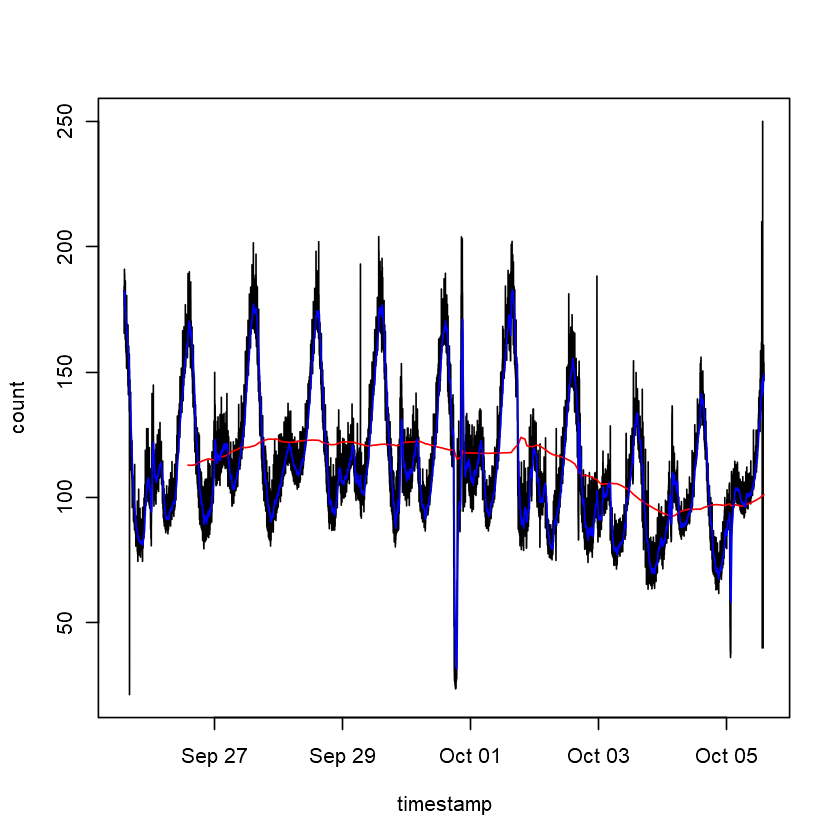

In [23]:
plot(raw_data,type='l')
lines(raw_data[,'timestamp'],SMA(raw_data[,'count'],1440),type='l',col='red')
lines(raw_data[,'timestamp'],EWMA(raw_data[,'count'],0.05),type='l',col='blue')

- SMAÎäî Îπ®Í∞Ñ ÏÑ†ÏúºÎ°ú ÌïòÎ£®(1440Î∂Ñ) Ï£ºÍ∏∞Î°ú smoothingÏùÑ ÌñàÏùÑ Îïå smoothingÏùÑ ÎÑàÎ¨¥ ÎßéÏù¥ Ìï¥ÏÑú Í±∞Ïùò ÏßÅÏÑ†Ïóê Í∞ÄÍπåÏõåÏ†∏ Î≤ÑÎ†§ Í≥ÑÏ†àÏÑ±Í≥º Í∞ôÏùÄ Ìå®ÌÑ¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏûÉÏñ¥Î≤ÑÎ†∏ÏäµÎãàÎã§.
- EWMAÎäî ÌååÎûÄÏÑ†ÏúºÎ°ú $\alpha$Î•º 0.05Î°ú ÎëêÏñ¥ ÏµúÍ∑º Ï†ïÎ≥¥Î•º ÎßéÏù¥ Î∞òÏòÅÌïòÍ≤å ÌñàÏßÄÎßå Ìïú ÏãúÏ†ê Ï†ïÎèÑ ÎäêÎ¶¨Í≤å Ï∂îÏÑ∏Î•º Îî∞ÎùºÍ∞ÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏóàÏäµÎãàÎã§.

In [24]:
EWMA_error<-raw_data[,'count']-EWMA(raw_data[,'count'],0.01)

In [25]:
ESD_EWMA<-ESD(  EWMA_error ,0.05,7000,one_tail=FALSE,upper_tail=FALSE)

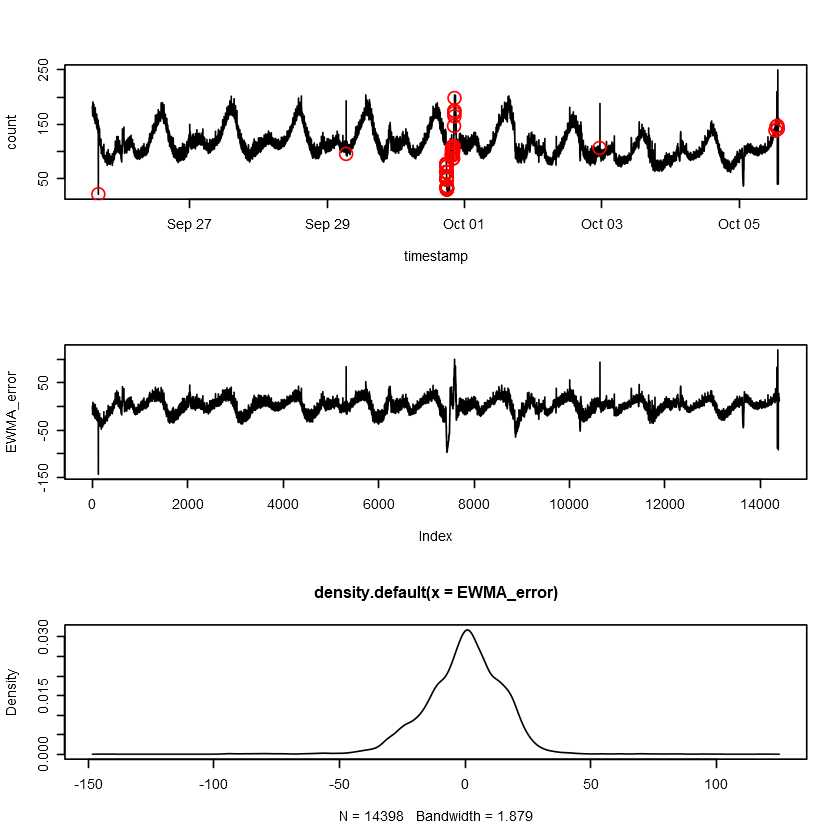

In [26]:
par(mfrow=c(3,1))
plot(raw_data,type='l')
points(raw_data[ESD_EWMA,],col='red',cex=2)
plot(EWMA_error,type='l')
plot(density(EWMA_error))

Ï≤´ Ïß∏ Í∑∏Î¶ºÏùÄ EWMAÎ°ú Îç∞Ïù¥ÌÑ∞Ïùò Ìä∏Î†åÎìúÎ•º Ï†úÍ±∞ÌïòÍ≥† ESDÎ•º Ï†ÅÏö©Ìïú Í≤É ÏûÖÎãàÎã§. <br>
Îß® Ïö∞Ï∏°Ïùò OutlierÎ•º ÌÉêÏßÄ Î™ªÌïòÍ≥† ÌäπÏ†ï Í∏∞Í∞ÑÏùò outlierÎ•º ÏßëÏ§ëÏ†ÅÏúºÎ°ú Ìè¨Ï∞©ÌñàÏäµÎãàÎã§ <br>
Ïù¥Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ global anomalyÏôÄ seasonal anomaly Î™®Îëê Ìè¨Ï∞©ÌïòÎäîÎç∞ Î¨∏Ï†úÍ∞Ä ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.<br>
<br>
Îëê Î≤àÏß∏ Í∑∏Î¶ºÏùÄ ResidualÏùò plotÏúºÎ°ú Ïó¨Ï†ÑÌûà Í≥ÑÏ†àÏÑ±Ïù¥ Ï°¥Ïû¨Ìï®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.<br>
ÏÑ∏ Î≤àÏß∏ Í∑∏Î¶ºÏùÄ residualÏùò plotÏúºÎ°ú Ïó¨Ï†ÑÌûà Normal Î∂ÑÌè¨ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†§Ïõå ESDÎ•º Ï†ÅÏö©ÌïòÎäîÍ≤å ÌÉÄÎãπÌïúÏßÄÏóê ÎåÄÌïú ÏùòÎ¨∏Ïù¥ ÏÉùÍπÅÎãàÎã§.

ÎòêÌïú Ïù¥Îèô ÌèâÍ∑† Î∞©Î≤ïÏùÄ ÎåÄÎ∂ÄÎ∂ÑÏùò Í≥ÑÏ†àÏÑ±ÏùÑ Í∞ÄÏßÑ anomalyÎ•º filter out Ìï¥Î≤ÑÎ¶¨Îäî Î¨∏Ï†úÏ†êÏù¥ ÏûàÏäµÎãàÎã§


# 3-2. Seasonality and STL

Ïù¥Ï†ú Í≥ÑÏ†àÏÑ±ÏùÑ Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌï¥ SeasonalityÎ•º Í≥†Î†§Ìï† Ïàò ÏûàÎäî STL decompositionÏóê ÎåÄÌï¥ ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§.

Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ Îã§Ïãú ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§.
- Îç∞Ïù¥ÌÑ∞Ïùò Í≥ÑÏ†àÏÑ±Ïù¥ ÎöúÎ†∑ <br>
- Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Í∞Ä multimodalÎ°ú normal ÌïòÏßÄ ÏïäÏùå<br>
- Î©ÄÌã∞ Î™®Îã¨Ïùº Í≤ΩÏö∞ ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÎÜíÏïÑÏ†∏ÏÑú ÏßÑÏßú anomalyÎ•º Ï∞æÎäîÎç∞ Î∞©Ìï¥Ìï®<br>
- ResidualÏù¥ Ïú†ÎãàÎ™®Îã¨Ìïú Î∂ÑÌè¨Ïù¥Î©¥ ESD Í∞ôÏùÄ Î∞©Î≤ï ÌôúÏö© Í∞ÄÎä•Ìï¥Ïßê<br>

$X$: ÏõêÎûò ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞<br>
$S_{x}$:Í≥ÑÏ†àÏÑ±<br>
$T_{x}$:Ìä∏Î†åÎìú<br>
$R_{x}$:Residual<br>
$X$Î•º $S_{x}$,$T_{x}$,$R_{x}$Î°ú Î∂ÑÌï¥Ìï¥ ResidualÏùÑ Ï∞æÏùå

Ï†ÑÌòïÏ†ÅÏù∏ STL decompostionÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.<br>
$T_{x}$: moving average filterÏùÑ ÏÇ¨Ïö©<br>
Í∑∏ÌõÑÏóê $X-T_{x}$Î°ú Ìä∏Î†åÎìú Ï†úÍ±∞<br>
$S_{x}$ÏùÄ sub-cycleÏùò ÌèâÍ∑†ÏúºÎ°ú Íµ¨ÌïòÏûê (sub-cycleÏùÄ ÏòàÎ•º Îì§Ïñ¥, Îã¨ÎßàÎã§, Ïó∞ÎßàÎã§ Í≥ÑÏ†àÏÑ±Ïù¥ Îëê Í∞ú ÏûàÏúºÎ©¥ Îçî ÏûëÏùÄ Îã¨ÎßàÎã§ Í≥ÑÏ†àÏÑ±ÏùÑ ÎßêÌï®, Ïó¨Í∏∞ÏÑúÎäî ÌïòÎ£®ÎßàÎã§)<br>
$R_{x}=X-T_{x}-S_{x}$

ÌïòÏßÄÎßå $T_{x}$Ïóê Îã®ÏàúÌïú moving average filterÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ResidualÏóê Í∑πÎã®Ï†ÅÏù∏ anomalyÍ∞Ä ÏûàÏúºÎ©¥ Ï†úÎåÄÎ°ú ÏûëÏö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.<br>
Îî∞ÎùºÏÑú LOESSÎ•º ÏÇ¨Ïö©Ìïú Î°úÎ≤ÑÏä§Ìä∏ Ï∂îÏ†ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í≥ÑÏ†àÏÑ±ÏùÑ Ï∂îÏ†ïÌïòÏòÄÏäµÎãàÎã§.<br> 
LOESSÎäî decompostion Î∞©Î≤ïÏù¥ Îçî Î≥µÏû°Ìïú Ìï®ÏàòÏóê Ï†ÅÌï©Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî Ïû•Ï†êÏù¥ ÏûàÏäµÎãàÎã§.

In [27]:
TS_data<-ts(raw_data[,'count'], frequency = 1440)
data_decomp <- stl(TS_data,s.window = "periodic", robust = TRUE)
S<-data_decomp$time.series[,1]

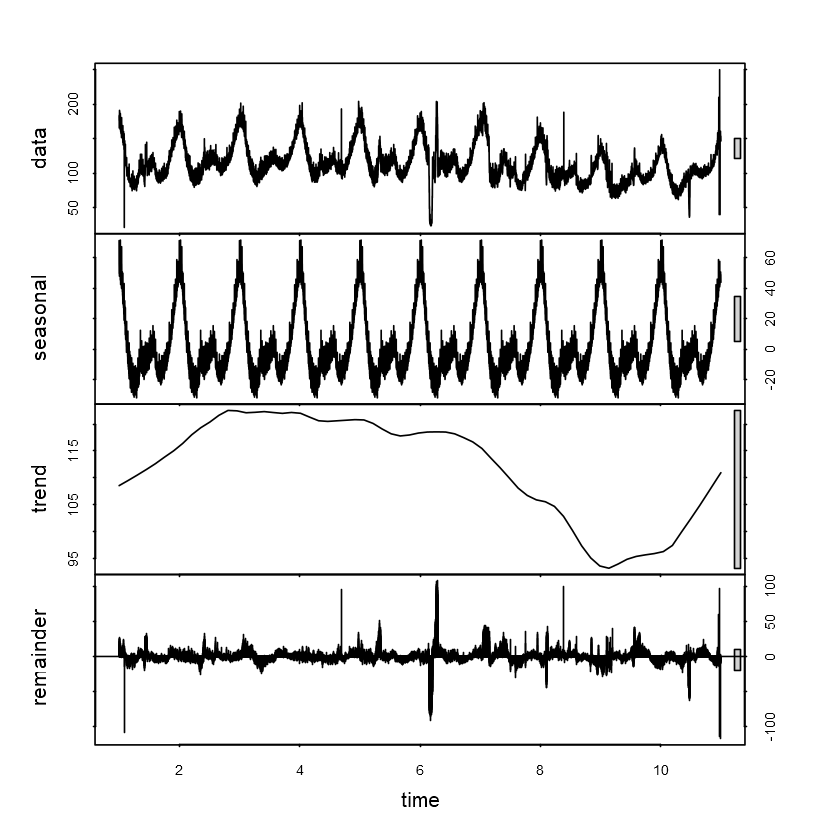

In [28]:
plot(data_decomp)

In [29]:
ESD_STL<-ESD(  data_decomp$time.series[,3] ,0.05,7000,one_tail=FALSE,upper_tail=FALSE)

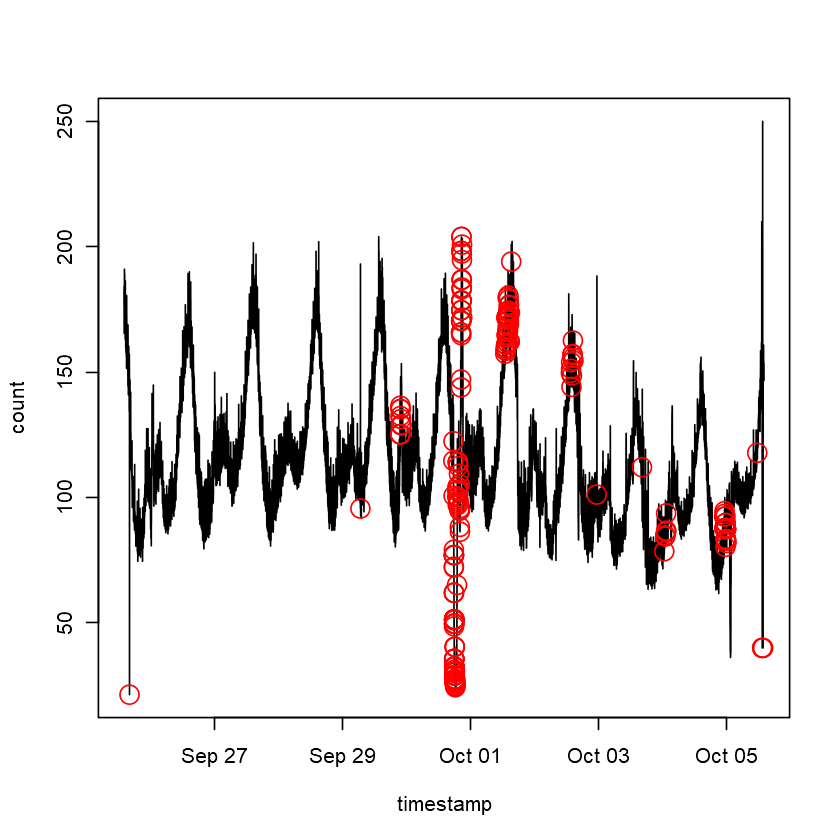

In [30]:
plot(raw_data,type='l')
points(raw_data[ESD_STL,],col='red',cex=2)

- STL decompostionÏúºÎ°ú ÌïòÎ©¥ EWMAÎßåÏùÑ ÏÇ¨Ïö©ÌñàÏùÑ ÎïåÎ≥¥Îã§ Ìõ®Ïî¨ ÎßéÏùÄ AnomalyÎ•º Ï∞æÏïÑ ÎÉàÏäµÎãàÎã§ 
- ÌïòÏßÄÎßå 10Ïõî 4ÏùºÏùÑ Î≥¥Î©¥ AnomalyÍ∞Ä ÏïÑÎãåÎç∞ÎèÑ  Ïû°ÏïÑÎÇ∏ Í≤ÉÎèÑ Î≥¥ÏûÖÎãàÎã§.<br>
- ÎòêÌïú 10Ïõî 1Ïùº Î∂ÄÍ∑ºÏùò AnomalyÎßå ÏßëÏ§ëÏ†ÅÏúºÎ°ú Ïû°ÏïÑÎÇ∏ Î¨∏Ï†úÍ∞Ä ÏûàÏäµÎãàÎã§.

# 4. TwitterÏùò Ï†úÏïà Î™®Îç∏

# 4.1. STL Variants (S-ESD)

- ÏïûÏÑú Î≥∏ Í≤É Ï≤òÎüº STL decompostionÏúºÎ°ú ÌïòÎ©¥ Spurious anomalyÎ•º ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§(anomalyÍ∞Ä ÏïÑÎãåÎç∞ anomlayÎ°ú Ï∞©Í∞Å)<br>
- Îî∞ÎùºÏÑú Ìä∏Î†åÎìúÎ•º ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏúÑÏàòÎ°ú ÎëêÎäî $\tilde{X}$ Ïù¥Ïö©ÌïòÏó¨ <br>
- $R_{x}=X-S_{x}-\tilde{X}$Î°ú decompostion Ìï† Í≤ÉÏùÑ Ï†úÏïà


- Î®ºÏ†Ä Í≥ÑÏ†àÏÑ± $S_x$ÏùÑ Ï∂îÏ†ïÌï† Îïå LOESSÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ÑÏ†àÏÑ±ÏùÑ Î∂ÑÌï¥Ìï©ÎãàÎã§.<br>
- Ïù¥ÌõÑ ÏïàÏ†ïÏ†ÅÏù∏ Ìä∏Î†åÎìúÎ•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥ MedainÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ìä∏Î†åÎìúÎ•º Î∂ÑÌï¥Ìï©ÎãàÎã§.<br>
- MedianÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ìä∏Î†åÎìúÎ•º Î∂ÑÌï¥ÌïòÏó¨ ResidualÏùÑ ÏïàÏ†ïÌôî ÏãúÏºú SpuriousÎ•º Ï†úÍ±∞Ìï©ÎãàÎã§

In [32]:
STL_VAR<-TS_data-S-median(TS_data)

In [33]:
ESD_STL_VAR<-ESD(  STL_VAR ,0.05,7000,one_tail=FALSE,upper_tail=FALSE)

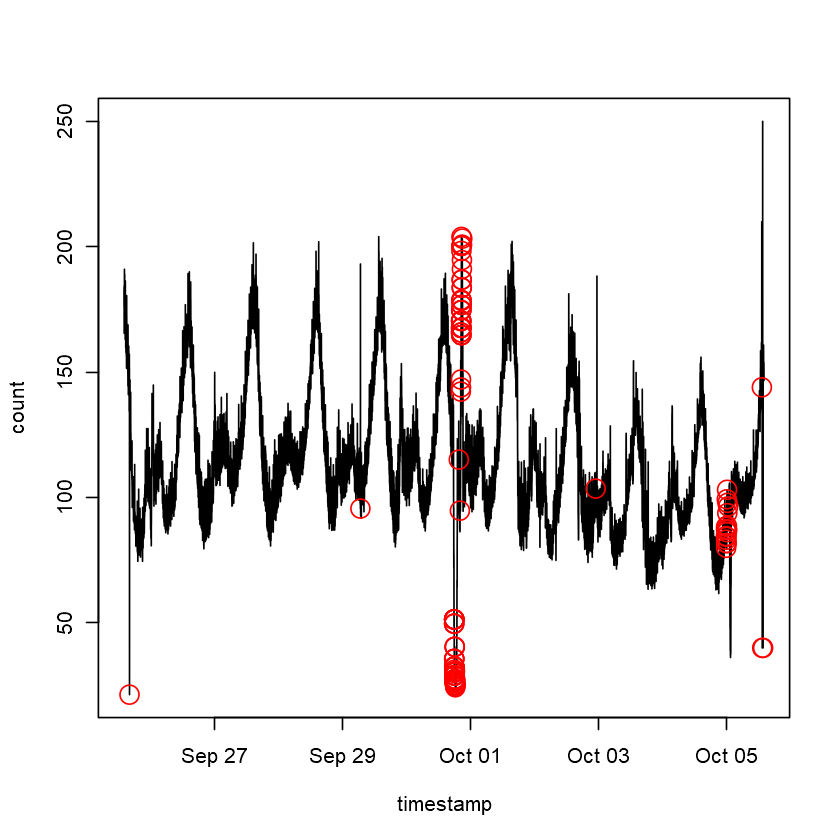

In [34]:
plot(raw_data,type='l')
points(raw_data[ESD_STL_VAR,],col='red',cex=2)

- 10Ïõî 4Ïùº ÏØ§Ïóê STLÎ°ú anomalyÎùºÍ≥† ÏßÑÎã®ÌñàÎçò Í≤ÉÎì§Ïù¥ ÏÇ¨ÎùºÏ†∏ Suprious anomalyÎ•º Ïû°ÏïÑÎÇ¥Îäî Î¨∏Ï†úÍ∞Ä ÎßéÏù¥ Í∞úÏÑ† ÎêêÏäµÎãàÎã§<br>

- ÌïòÏßÄÎßå S-ESDÎäî global anomalyÏôÄ local anomalyÎ•º Î∞úÍ≤¨Ìï† Ïàò ÏûàÏßÄÎßå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú anomalyÏùò ÎπÑÏú®Ïù¥ ÎÜíÏúºÎ©¥ Ïûò ÏûëÏö©ÏùÑ ÏïàÌïòÎäî Î¨∏Ï†úÍ∞Ä ÏûàÏäµÎãàÎã§.
- Í∑∏ Ïù¥Ïú†Îäî ESD Í≤ÄÏ†ï Î∂ÄÎ∂ÑÏóêÏÑú ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∞íÏù¥ ÌÅ∞ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Í≥ºÎåÄ Ï∂îÏ†ïÌïòÍ≤å ÎßåÎì§Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§

#  4-2. Seasonal Hybrid ESD (S-H-ESD)

ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Îäî OutlierÏóê ÎØºÍ∞êÌïòÎã§Îäî Î¨∏Ï†úÍ∞Ä ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú TwitterÏóêÏÑúÎäî Ï≤ôÎèÑÏóê MedianÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏùÑ Ï†úÏïàÌñàÏäµÎãàÎã§.
- Medain(Ï§ëÏúÑÏàò)ÏùÄ OutlierÏóê Îçî robustÌïòÎã§Îäî Ïû•Ï†ê<br>
MAD: Î∂ÑÏÇ∞ÏùÑ ÎåÄÏã†ÌïòÏó¨ ÏÇ¨Ïö© $MAD=median_{i}(|X_{i}-median_{j}(X_{j}) |)$<br>
$\hat{\sigma}=b\cdot MAD$<br>
Îç∞Ïù¥ÌÑ∞Í∞Ä Normal Î∂ÑÌè¨Î•º Îî∞Î•ºÎïå b=1.4286<br>
Leyes Îì±ÏùÄ Normal Î∂ÑÌè¨Í∞Ä ÏïÑÎãê Îïå $b=\frac{1}{Q(0.75)}$Î•º ÏÇ¨Ïö©Ìï† Í≤ÉÏùÑ Ï†úÏïà ($Q(0.75)$ÏùÄ Î∂ÑÌè¨ÏóêÏÑú 0.75 quantile)

Seasonal Hybrid ESDÎäî S-ESDÏóêÏÑú ESDÎ•º Í≥ÑÏÇ∞Ìï† Îïå MedianÏùÑ Ïù¥Ïö©Ìïú Ïù¥ÏÉÅÏπòÏóê Î°úÎ≤ÑÏä§Ìä∏Ìïú Ï≤ôÎèÑÎ•º ÏÇ¨Ïö©Ìïú Î∞©Î≤ïÏûÖÎãàÎã§.

In [38]:
HESD<-function(data,alpha=0.05,max_outliers,one_tail=FALSE,upper_tail=TRUE){
    
    n=length(data)
    alpha=0.05
    outlier_idx<-c()
    
    for (i in 1L:max_outliers){

    
    if(one_tail){
        if(upper_tail){
            ares <- data - median(data)
        } else {
            ares <- median(data) - data
        }
    } else {
        ares = abs(data - median(data))
    }
        
    ## Compute critical value.
    data_sigma <- mad(data)
    ares <- ares/data_sigma
    R <- max(ares)

    idx <- which.max(ares) #maximum value's index
    outlier_idx<-c(outlier_idx,idx)
    data <- data[- idx ] #remove maximum data

    ## Compute critical value.
    if(one_tail){
        p <- 1 - alpha/(n-i+1)
    } else {
        p <- 1 - alpha/(2*(n-i+1))
    }
    t <- qt(p,(n-i-1))
    lam <- t*(n-i) / sqrt((n-i-1+t**2)*(n-i+1))

    #When reject Null (There is Outlier)
    if(R > lam) {
        num_anoms <- i
        }
}

### Select maximum k satisfying condition

if(num_anoms > 0) {
    outlier_idx<-outlier_idx[1:num_anoms]
} else {
  outlier_idx<-NULL  
}
return (outlier_idx)    
}

In [39]:
HESD_B=HESD(B,0.05,10,one_tail=FALSE,upper_tail=FALSE)
HESD_C=HESD(C,0.05,10,one_tail=FALSE,upper_tail=FALSE)
HESD_B
HESD_C

[1] 42 21

[1] 54 53 52 51

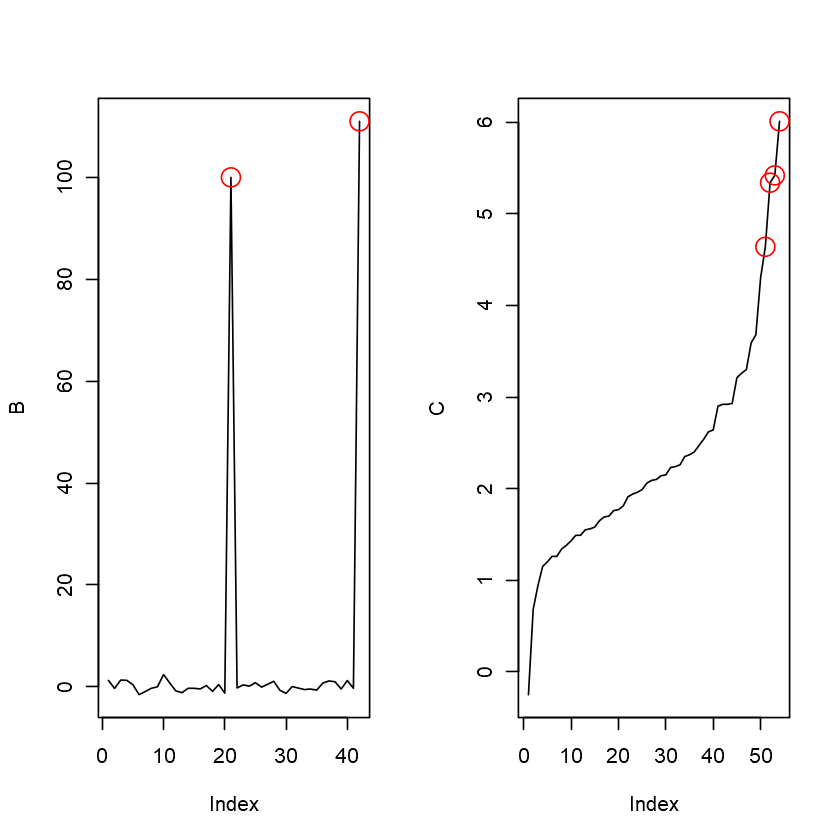

In [40]:
par(mfrow=c(1,2))
plot(B,type='l')
points(HESD_B,B[HESD_B],col='red',cex=2)
plot(C,type='l')
points(HESD_C,C[HESD_C],col='red',cex=2)

Median, MADÎ•º ÏÇ¨Ïö©ÌñàÏùÑ Îïå BÏóêÏÑúÎäî Í∞ôÏùÄ Ïù¥Ï†ÑÍ≥º Í∞ôÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏóàÏßÄÎßå CÏóêÏÑúÎäî Îç∞Ïù¥ÌÑ∞ ÌïòÎÇòÎ•º Îçî outlierÎùºÍ≥† ÏßÑÎã®ÌñàÏäµÎãàÎã§<br>
Ïù¥Ï†ú Ìä∏ÏúÑÌÑ∞ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§

In [35]:
data.frame(MEAN=mean(raw_data[,'count']),MEDIAN=median(raw_data[,'count']),SD=sd(raw_data[,'count']),MAD=mad(raw_data[,'count']))

MEAN     MEDIAN  SD       MAD     
1 112.5469 107.435 26.51225 21.09265

Îç∞Ïù¥ÌÑ∞Î•º Î¥§ÏùÑ Îïå ÌèâÍ∑†Í≥º Ï§ëÏúÑÏàòÎäî 5 Ï†ïÎèÑ Ï∞®Ïù¥Í∞Ä ÎÇòÍ≥† ÌëúÏ§ÄÌé∏Ï∞®ÏôÄ MAD ÎòêÌïú 5Ï†ïÎèÑ Ï∞®Ïù¥Í∞Ä ÎÇ¨ÏäµÎãàÎã§.<br>
Ïù¥Îäî ÌèâÍ∑†Ïù¥ÎÇò ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä Ï§ëÏúÑÏàòÏôÄ MAD Î≥¥Îã§ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏßïÏùÑ Í≥ºÎåÄ Ï∂îÏ†ïÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

In [36]:
ESD_STL_HESD<-HESD(  STL_VAR ,0.05,7000,one_tail=FALSE,upper_tail=FALSE)

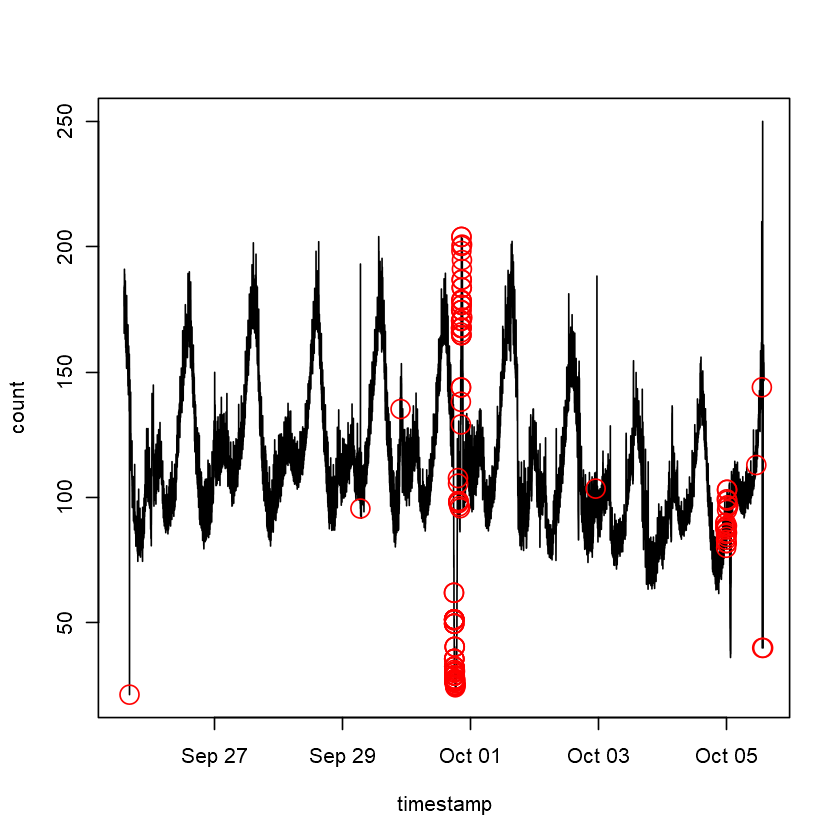

In [37]:
plot(raw_data,type='l')
points(raw_data[ESD_STL_HESD,],col='red',cex=2)

- S-H-ESDÎ•º Ï†ÅÏö©ÌñàÏùÑ Îïå AnomalyÎùºÍ≥† ÏßÑÎã® Îêú Í≤ÉÏù¥ Îçî Ï†ÅÏñ¥ Î°úÎ≤ÑÏä§Ìä∏ÌïòÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
- ÌäπÌûà 10Ïõî 2Ïùº Ï§ëÏàúÏóê S-ESDÏóêÏÑú AnomalyÎùºÍ≥† ÏßÑÎã®ÌñàÎçò Í≤ÉÏùÑ S-H-ESDÏóêÏÑúÎäî AnomlayÍ∞Ä ÏïÑÎãàÎùºÍ≥† ÏßÑÎã®ÌñàÍ≥† ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î¥§ÏùÑ Îïå S-H-ESDÏùò Í≤∞Í≥ºÍ∞Ä Îçî ÌÉÄÎãπÌï¥ Î≥¥ÏûÖÎãàÎã§
- ÎòêÌïú Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î¥§ÏùÑ Îïå S-H-ESDÍ∞Ä seasonal anomalyÎÇò local anamalyÎ•º Ìõ®Ïî¨ Îçî Ïûò ÌÉêÏßÄÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§

# 5. ÌèâÍ∞Ä

1) Capacity Engineering: Í≥ºÎ∂ÄÌïòÎêú Îç∞Ïù¥ÌÑ∞Î•º Precision, Recall, F-scoreÎ°ú ÌèâÍ∞Ä<br>
2) User behavior: ÏÑúÎπÑÏä§ Ï†úÍ≥µÏûêÍ∞Ä ÏÇ¨Ïö©Ïûê ÌñâÎèôÏùÑ Î≥ÄÌôî ÏãúÌÇ¨ Ïàò ÏûàÎäî Ïã†Ìò∏Î•º ÌÉêÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í¥ÄÏã¨ ÏûàÎäî Î∂ÄÎ∂ÑÏóê ÏûÑÍ≥ÑÏπòÎ•º ÏÑ§Ï†ïÌïòÍ≥† Í∑∏Í≤ÉÏùÑ ÎÑòÏóàÎÉê Ïïà ÎÑòÏóàÎÉêÎ•º Precision, Recall, F-scoreÎ°ú ÌèâÍ∞Ä<br>
3) Supervised Learning: anomalyÏù∏ÏßÄ ÏïÑÎãåÏßÄ ÏùºÏùºÌûà Î†àÏù¥Î∏îÏùÑ Îã¨Í∏∞Îäî Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞Ïóê Smooth spline Ï†ÅÌï©Ìï¥ÏÑú ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÏôÄ Í∞ôÏùÄ ÏÑ±ÏßàÏùò Ìä∏Î†åÎìúÏôÄ Í≥ÑÏ†àÏÑ±ÏùÑ Ï∂îÏ∂ú. Í∑∏ÌõÑÏóê ÏßÑÏßú anomalyÎ•º Ï∂îÏ∂úÌïú ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎÑ£Ïñ¥ÏÑú ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Í∑∏ ÏßÑÏßú anomalyÎ•º ÏñºÎßàÎÇò ÌÉêÏßÄÌïòÎäîÏßÄ Ï∏°Ï†ï